# Course Name: Visualisation for Data Analytics
# Objective: Supervised Learning: Linear Regression

In this section we will be going over linear regression. We'll be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston. We'll start off with a single variable linear regression using numpy and then move on to using scikit learn. 


### Step 1: Getting and setting up the data.

We'll start by looking a an example of a dataset from scikit-learn. First we'll import our usual data analysis imports, then sklearn's built-in boston dataset.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

Imports for plotting

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Now import dataset from scikit learn as well as the linear_model module. Note: You may have to run a download, scikit learn will read an error and prompt you to if you don't have the datasets.

In [3]:
from sklearn.datasets import load_boston

Next we'll download the data set

In [4]:
# Load the housing dataset
boston = load_boston()

# step -2  Let's see what the data set contains

In [7]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Step 3: Visualizing current data

### 3.1 You should always try to do a quick visualization fo the data you have. Let's go ahead an make a histogram of the prices.

In [10]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Text(0, 0.5, 'Number of houses')

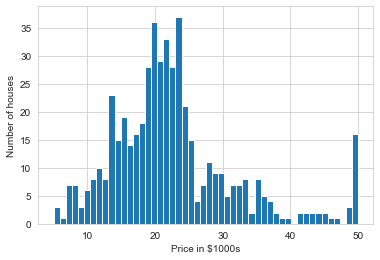

In [9]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

### 3.2 Interesting, now let's see a scatter plot of one feature, versus the target. In this case we'll use the housing price versus the number of rooms in the dwelling.

Text(0.5, 0, 'Number of rooms')

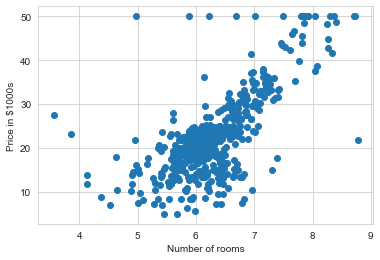

In [11]:
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

### Step-4 Let's try to do the following:

    1.) Use pandas to transform the boston dataset into a DataFrame: 
    
    2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line. Use   'RM' attribute for this task.

In [12]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names

#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
# Set price column for target
boston_df['Price'] = boston.target

In [14]:
# Show result
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


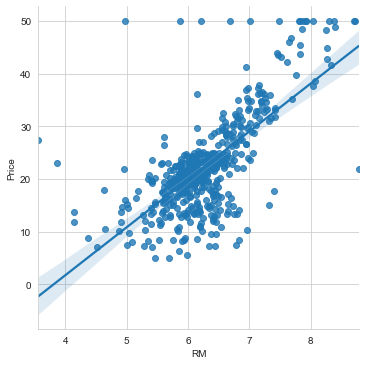

In [15]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data = boston_df)

### Step 5: Using scikit learn to implement a multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the linear regression library from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods

In [16]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [17]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [18]:
#We'll start the multi variable regression analysis by seperating our boston dataframe into the data columns and the target columns:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price


In [19]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)


LinearRegression()

In [20]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))


 The estimated intercept coefficient is 36.46 
 The number of coefficients used was 13 


In [21]:
#What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.

# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Step 7: Using Training and Validation 

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is *randomly*.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. ou can learn more about these parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [23]:
from sklearn.model_selection import train_test_split


In [26]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,boston_df.Price)

In [27]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


### Step 8: Predicting Prices

Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices. We'll use our training set for the prediction and then use our testing set for validation.

In [28]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

In [29]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [30]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 23.79
Fit a model X_train, and calculate MSE with X_test and Y_test: 17.06


### Step 9 : Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

$$Residual = Observed\:value - Predicted\:value $$

You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

Text(0.5, 1.0, 'Residual Plots')

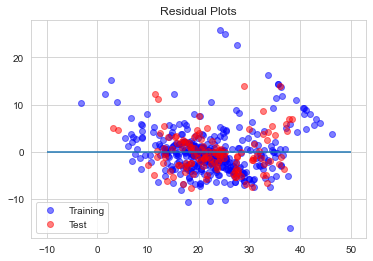

In [31]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

<AxesSubplot:xlabel='RM', ylabel='Price'>

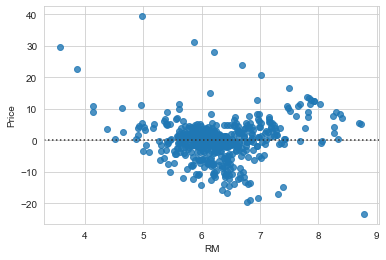

In [35]:
# Residual plot of all the dataset using seaborn
sns.residplot(x='RM',y='Price', data = boston_df)

### Reference:
Udemy course: Learning Python for Data Analysis and Visualization
https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb



#
That's it for this lesson. Linear regression is a very broad topic, theres a ton of great information in the sci kit learn documentation, and I encourage you to check it out here:  http://scikit-learn.org/stable/modules/linear_model.html#linear-model